In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import Standard_Functions as sf

In [2]:
''' Reading in the data from the pickle storage files. '''
x_train = pd.read_pickle('KDD_x_train_dummy.pkl').values
x_test = pd.read_pickle('KDD_x_test_dummy.pkl').values
y_train_type = pd.read_pickle('KDD_y_train_col_5.pkl').values
y_test_type = pd.read_pickle('KDD_y_test_col_5.pkl').values
y_train_binary = pd.read_pickle('KDD_y_train_col_1.pkl').values
y_test_binary = pd.read_pickle('KDD_y_test_col_1.pkl').values
y_train_intrusion = pd.read_pickle('KDD_y_train_col_40.pkl').values
y_test_intrusion = pd.read_pickle('KDD_y_test_col_40.pkl').values

x_train_norm= normalize(x_train, axis=1, norm='l2')
x_test_norm= normalize(x_test, axis=1, norm='l2')

In [83]:
''' Sample neural network with input layer size 100, one hidden layer size 100, and output layer size 1. 
    Use online tutorials to construct more complex neural networks such as convolutional or recurrent types. '''

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=20)

In [84]:
''' Function that actually trains the model. '''
history = model.fit(x_train_norm, y_train_binary, batch_size=256, epochs=20, validation_data=(x_test_norm, y_test_binary), callbacks=[early_stopping_monitor])

Train on 494020 samples, validate on 311028 samples
Epoch 1/20
494020/494020 [==============================] - 14s 28us/sample - loss: 0.0332 - acc: 0.9884 - val_loss: 0.5775 - val_acc: 0.8757
Epoch 2/20
494020/494020 [==============================] - 13s 26us/sample - loss: 0.0117 - acc: 0.9967 - val_loss: 0.6809 - val_acc: 0.9230
Epoch 3/20
494020/494020 [==============================] - 13s 27us/sample - loss: 0.0090 - acc: 0.9974 - val_loss: 0.6195 - val_acc: 0.9232
Epoch 4/20
494020/494020 [==============================] - 14s 27us/sample - loss: 0.0078 - acc: 0.9977 - val_loss: 0.6927 - val_acc: 0.9236
Epoch 5/20
494020/494020 [==============================] - 14s 28us/sample - loss: 0.0069 - acc: 0.9979 - val_loss: 0.7446 - val_acc: 0.9237
Epoch 6/20
494020/494020 [==============================] - 14s 28us/sample - loss: 0.0063 - acc: 0.9980 - val_loss: 0.7406 - val_acc: 0.9251
Epoch 7/20
494020/494020 [==============================] - 14s 29us/sample - loss: 0.0058 - acc

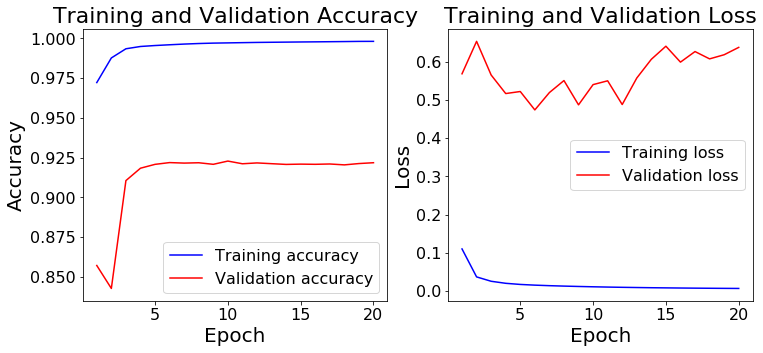

In [76]:
''' Plotting the accuracy and validation loss graphs. '''
sf.plot_history(history)

In [1]:
''' The remaining code was created to process the results. '''


In [94]:
y_pred = model.predict(x_test_norm)


In [97]:
binary_classification_accuracy_per_class = sf.accuracy_per_class_binary(y_pred, y_test_binary)


tp, tn, fp, fn = sf.tp_tn_fp_fn(binary_classification_accuracy_per_class)

''' These three lines calculate the precision, recall, and f1-scores which are the standard
    metrics used to evaluate ML classifiers. '''

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(recall * precision) / (recall + precision)

precision, recall, f1_score

(0.9985210337011788, 0.9112108482805986, 0.9528700931574574)

In [ ]:
binary_classification_accuracy_per_class = sf.accuracy_per_class_binary(y_pred, y_test_binary)

tp, tn, fp, fn = sf.tp_tn_fp_fn(binary_classification_accuracy_per_class)

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(recall * precision) / (recall + precision)

print(precision, recall, f1_score)

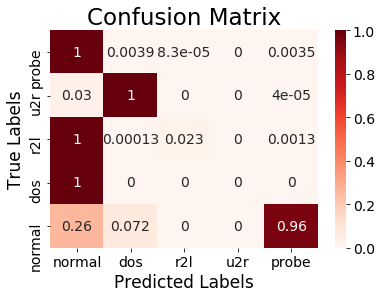

In [82]:
cm = sf.confusion_matrix_type(y_pred, y_test_type)
sf.show_confusion_matrix(cm)